In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

In [73]:
# loading the data

notebook_dir = Path.cwd()
# the data is located in data/raw folder
csv_dir = notebook_dir.parent.absolute() / 'clean_csvs'
csv_dir_grouped = csv_dir / 'messages_grouped_by_user'
csv_dir_separate = csv_dir / 'messages_separate'
visuals_dir = notebook_dir.parent.absolute() / 'visuals'

# df it all!!
imsg_df = pd.read_csv(csv_dir_grouped / 'aarush-imessage-grouped.csv')
discord_df = pd.read_csv(csv_dir_grouped / 'aarush-discord-grouped.csv')
ig_df = pd.read_csv(csv_dir_grouped / 'aarush-instagram-grouped.csv')
msngr_df = pd.read_csv(csv_dir_grouped / 'aarush-messenger-grouped.csv')


In [74]:
print(imsg_df.columns)

Index(['Unnamed: 0', 'user', 'text', 'word count', 'date', 'reactions',
       'game_pigeon', 'number of separated texts', 'platform'],
      dtype='object')


In [75]:
#clean imessage csv first
#imsg_df = imsg_df.drop('formatted_date', axis = 1)
imsg_df['type of reply'] = 'normal'
imsg_df['platform'] = 'IMessage'

# date, user, text, word count, number of separated texts, reactions, type of reply, game_pigeon, platform

new_column_order = ['date', 'user'] + [col for col in discord_df.columns if col not in ['type of reply', 'game_pigeon', 'platform','date', 'user']] + ['type of reply', 'game_pigeon', 'platform']

imsg_df = imsg_df[new_column_order]


In [76]:
#make date the first column of discord_df
#swap the order of columns so that date comes first
new_column_order = ['date', 'user'] + [col for col in discord_df.columns if col not in ['date', 'user']]

# Reorder DataFrame columns
discord_df = discord_df[new_column_order]

#add game pigeon column
discord_df = discord_df.drop('platform', axis = 1)
discord_df['type of reply'] = 'normal'
discord_df['game_pigeon'] = False
discord_df['platform'] = 'Discord'

In [77]:
# instagram column fixing

ig_df = ig_df.drop('platform', axis = 1)
ig_df['game_pigeon'] = False
ig_df['platform'] = 'Instagram'

In [78]:
# messenger column fixing

msngr_df = msngr_df.drop('platform', axis = 1)
msngr_df['type of reply'] = 'normal'
msngr_df['game_pigeon'] = False
msngr_df['platform'] = 'Messenger'

In [79]:
# merged columns: 
# date, user, text, word count, number of separated texts, reactions, type of reply, game_pigeon, platform

df = pd.concat([discord_df, imsg_df, ig_df, msngr_df], axis=0)

df.to_csv(csv_dir / 'all-messages.csv')

In [80]:
print(df.columns)

Index(['date', 'user', 'Unnamed: 0', 'text', 'word count',
       'number of separated texts', 'reactions', 'type of reply',
       'game_pigeon', 'platform'],
      dtype='object')


In [81]:
#plot number of messages against time, different colors for each type of platform

#convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format = 'mixed')

# Set the date column as the index
df.set_index('date', inplace=True)

# Resample the data to sum message counts every 10 days
resampled_df = df.groupby('platform').resample('1D')['number of separated texts'].sum().reset_index()
resampled_df = resampled_df[resampled_df['number of separated texts'] > 0]

In [82]:
print(resampled_df[resampled_df['date'] == '2024-07-20'])

       platform       date  number of separated texts
1704    Discord 2024-07-20                         68
1921   IMessage 2024-07-20                        518
3673  Instagram 2024-07-20                          8


C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\4223677613.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


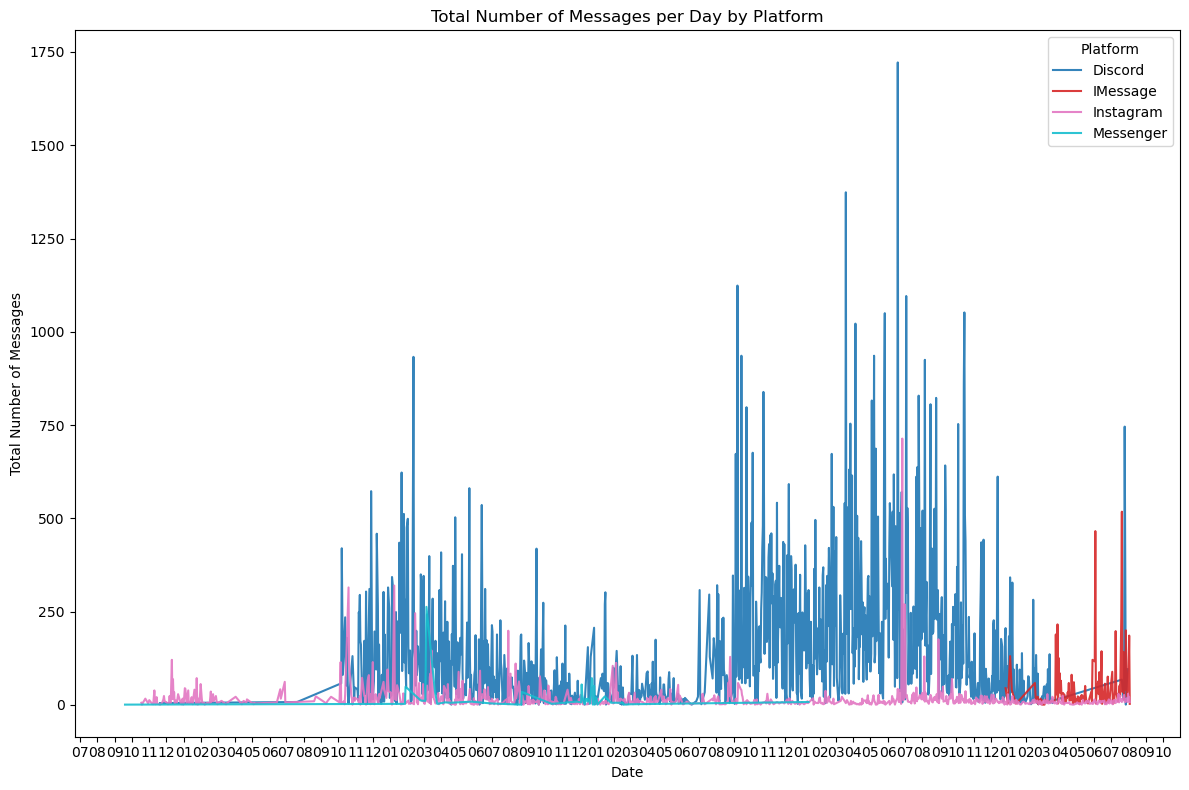

In [83]:
# Create a color map for platforms
platforms = resampled_df['platform'].unique()
colors = plt.cm.get_cmap('tab10', len(platforms))

alpha = 0.9

# Plot the data
plt.figure(figsize=(12, 8))
for platform, color in zip(platforms, colors.colors):
    platform_data = resampled_df[resampled_df['platform'] == platform]
    rgba_color = (*color[:3], alpha)
    plt.plot(platform_data['date'], platform_data['number of separated texts'], linestyle='-', color=rgba_color, label=platform)

plt.xlabel('Date')
plt.ylabel('Total Number of Messages')
plt.title('Total Number of Messages per Day by Platform')
# Set x-axis major locator and formatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.legend(title='Platform')
plt.tight_layout()
plt.savefig(visuals_dir / 'total-number-of-messages-per-day.png', format='png')

plt.show()


In [84]:
#plot number of messages against time, different colors for each type of platform

# Resample the data to sum message counts every 10 days
resampled_df_month = df.groupby('platform').resample('1M')['number of separated texts'].sum().reset_index()
resampled_df_month = resampled_df_month[resampled_df_month['number of separated texts'] > 0]

C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\2358836250.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df_month = df.groupby('platform').resample('1M')['number of separated texts'].sum().reset_index()


C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\1097077918.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


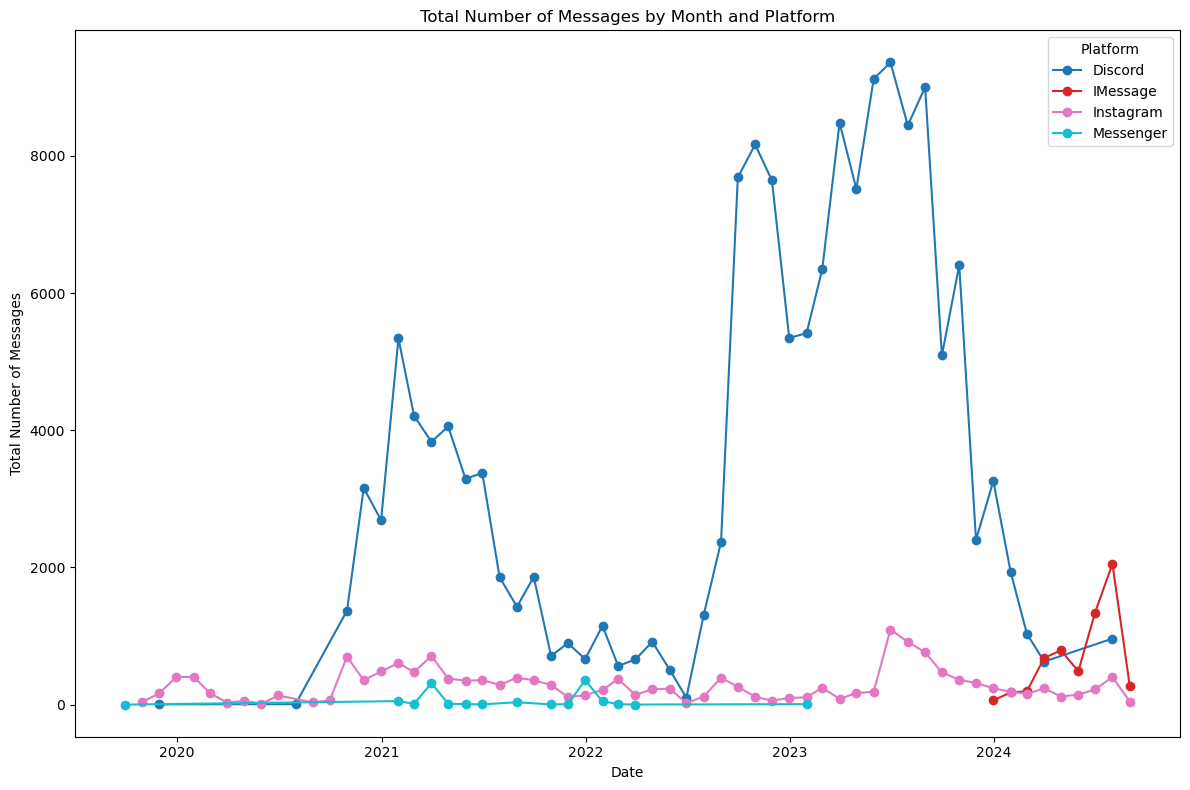

In [85]:
# Create a color map for platforms
platforms = resampled_df_month['platform'].unique()
colors = plt.cm.get_cmap('tab10', len(platforms))

# Create the plot
plt.figure(figsize=(12, 8))
for platform, color in zip(platforms, colors.colors):
    platform_data = resampled_df_month[resampled_df_month['platform'] == platform]
    plt.plot(platform_data['date'], platform_data['number of separated texts'], marker='o', linestyle='-', color=color, label=platform)

plt.xlabel('Date')
plt.ylabel('Total Number of Messages')
plt.title('Total Number of Messages by Month and Platform')

plt.legend(title='Platform')

plt.tight_layout()
plt.savefig(visuals_dir / 'total-number-of-messages-per-month.png', format='png')

plt.show()

In [86]:
df = imsg_df.copy()

df['Date'] = pd.to_datetime(df['date'])
df['Date_only'] = df['Date'].dt.date

# Count occurrences of each date
date_counts = df['Date_only'].value_counts()

# Identify the date with the highest count
most_frequent_date = date_counts.idxmax()
most_frequent_count = date_counts.max()

print(most_frequent_date)
print(most_frequent_count)


2024-06-03
236


In [87]:
def numberOfMessages(df):   
    df['date'] = pd.to_datetime(df['date'], format = 'mixed')

    # Set the date column as the index
    df.set_index('date', inplace=True)

    # Resample the data to sum message counts every 10 days
    resampled_df = df.groupby('platform').resample('1D')['number of separated texts'].sum().reset_index()
    resampled_df = resampled_df[resampled_df['number of separated texts'] > 0]
# Create a color map for platforms
    platforms = resampled_df['platform'].unique()
    colors = plt.cm.get_cmap('tab10', len(platforms))

    alpha = 0.9

    # Plot the data
    plt.figure(figsize=(12, 8))
    for platform, color in zip(platforms, colors.colors):
        platform_data = resampled_df[resampled_df['platform'] == platform]
        rgba_color = (*color[:3], alpha)
        plt.plot(platform_data['date'], platform_data['number of separated texts'], linestyle='-', color=rgba_color, label=platform)

    plt.xlabel('Date')
    plt.ylabel('Total Number of Messages')
    plt.title('Total Number of Messages per Day by Platform')
    # Set x-axis major locator and formatter
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    plt.legend(title='Platform')
    plt.tight_layout()
    platform_col = df['platform']
    
    if 'platform' in df.columns:
        print('hi')
        # Example: Save the plot with a platform-specific filename
        first_platform_value = df['platform'].dropna().iloc[0]
        filename = f"number_of_messages_by_date_for{first_platform_value}.png"
        plt.savefig(visuals_dir / filename)
    else:
        # Just show the plot if 'platform' column is not present
        plt.tight_layout()
        plt.show()
    plt.show()

C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\579803694.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


hi


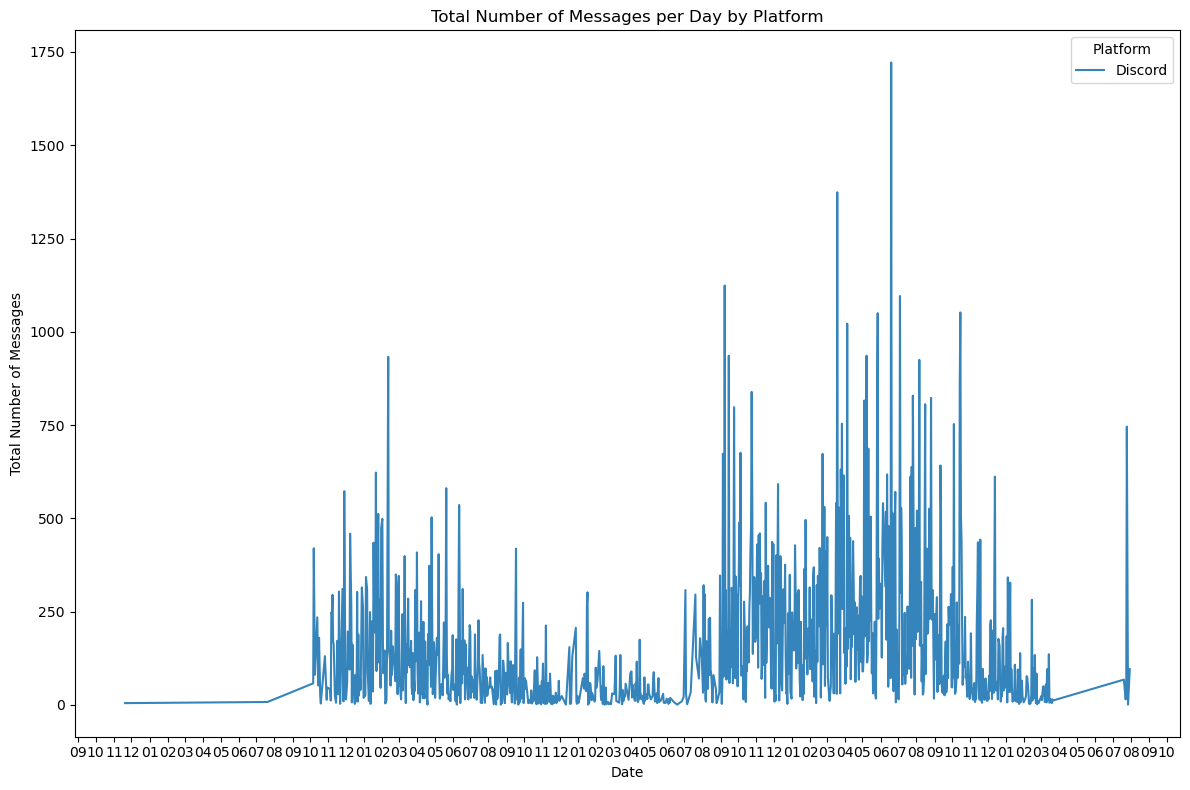

In [88]:
#discord_by_month = resampled_df_month[resampled_df_month['platform'] == 'Discord']
numberOfMessages(discord_df.copy())

C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\579803694.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


hi


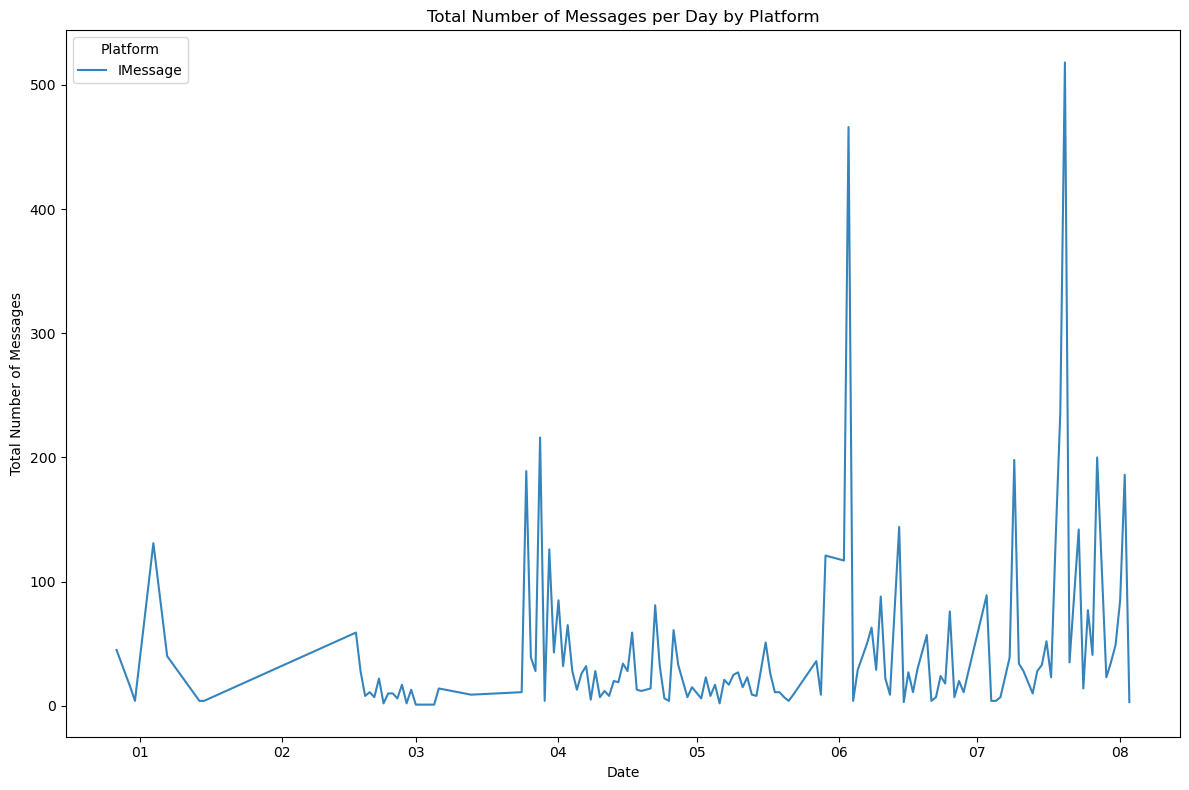

In [89]:
numberOfMessages(imsg_df.copy())

C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\579803694.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


hi


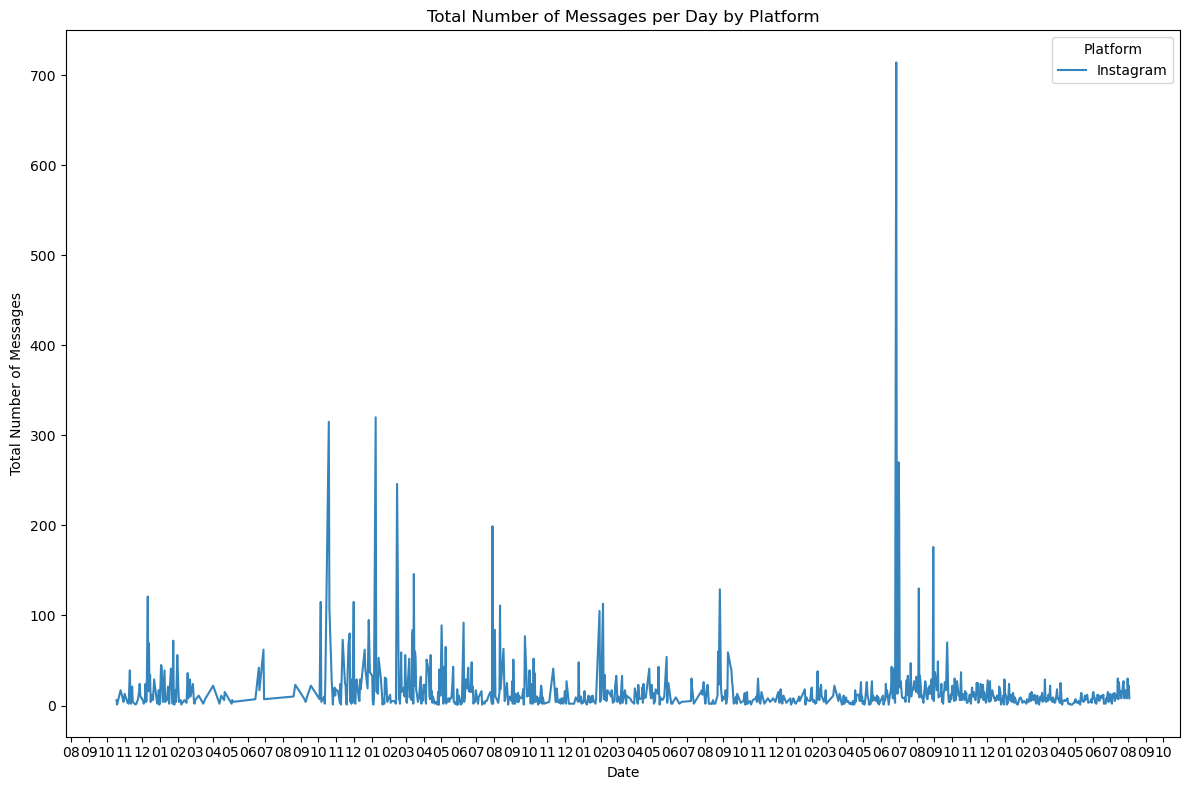

In [90]:
numberOfMessages(ig_df.copy())

C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\579803694.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


hi


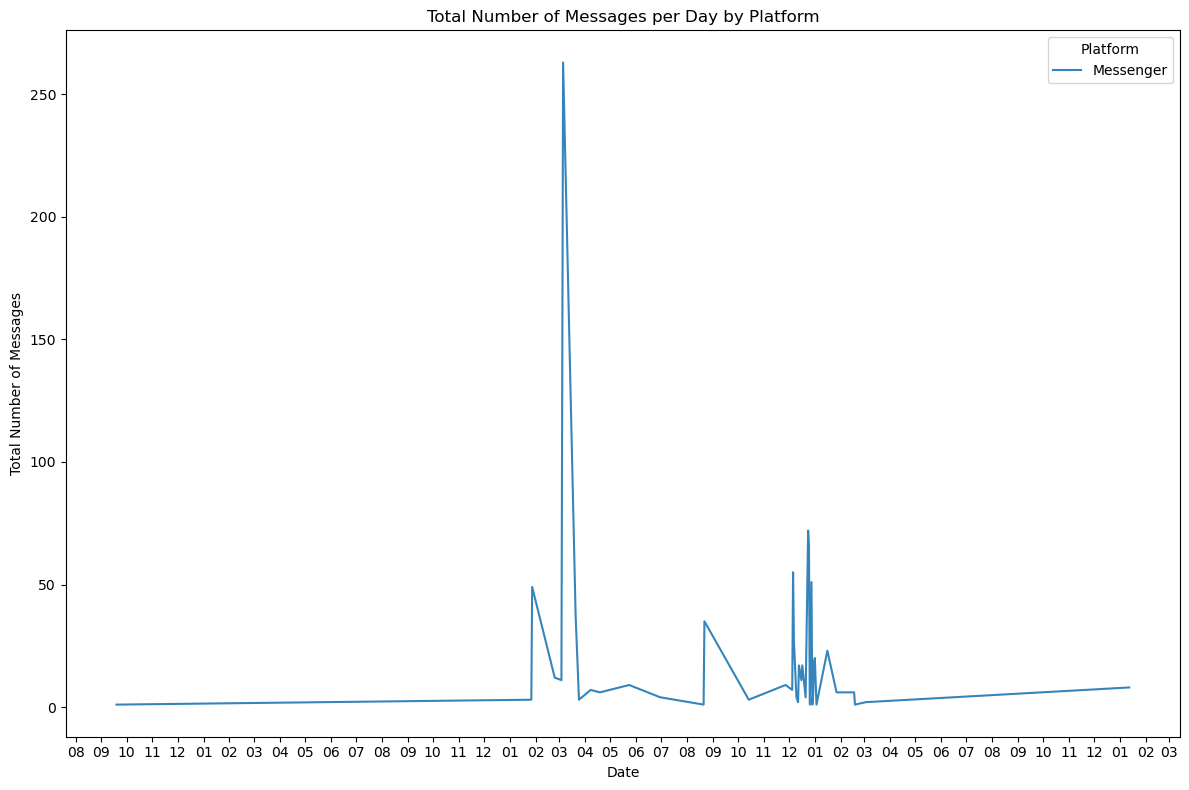

In [91]:
numberOfMessages(msngr_df.copy())

In [92]:
#monthly messages by date

def numberOfMonthlyMessages(df):   
    df['date'] = pd.to_datetime(df['date'], format = 'mixed')

    # Set the date column as the index
    df.set_index('date', inplace=True)

    # Resample the data to sum message counts every 10 days
    resampled_df = df.groupby('platform').resample('1D')['number of separated texts'].sum().reset_index()
    resampled_df = resampled_df[resampled_df['number of separated texts'] > 0]
# Create a color map for platforms
    platforms = resampled_df['platform'].unique()
    colors = plt.cm.get_cmap('tab10', len(platforms))

    alpha = 0.9

    # Plot the data
    plt.figure(figsize=(12, 8))
    for platform, color in zip(platforms, colors.colors):
        platform_data = resampled_df[resampled_df['platform'] == platform]
        rgba_color = (*color[:3], alpha)
        plt.plot(platform_data['date'], platform_data['number of separated texts'], linestyle='-', color=rgba_color, label=platform)

    plt.xlabel('Date')
    plt.ylabel('Total Number of Messages')
    plt.title('Total Number of Messages per Month by Platform')
    # Set x-axis major locator and formatter
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    plt.legend(title='Platform')
    plt.tight_layout()
    platform_col = df['platform']
    
    if 'platform' in df.columns:
        print('hi')
        # Example: Save the plot with a platform-specific filename
        first_platform_value = df['platform'].dropna().iloc[0]
        filename = f"number_of_messages_per_month_for{first_platform_value}.png"
        plt.savefig(visuals_dir / filename)
    else:
        # Just show the plot if 'platform' column is not present
        plt.tight_layout()
        plt.show()
    plt.show()

discord_month = resampled_df_month[resampled_df_month['platform'] == 'Discord']
ig_month = resampled_df_month[resampled_df_month['platform'] == 'Instagram']
msngr_month = resampled_df_month[resampled_df_month['platform'] == 'Messenger']
imsg_month = resampled_df_month[resampled_df_month['platform'] == 'IMessage']



In [93]:
discord_month = resampled_df_month[resampled_df_month['platform'] == 'Discord']
ig_month = resampled_df_month[resampled_df_month['platform'] == 'Instagram']
msngr_month = resampled_df_month[resampled_df_month['platform'] == 'Messenger']
imsg_month = resampled_df_month[resampled_df_month['platform'] == 'IMessage']



C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\3323349533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = 'mixed')
C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\3323349533.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


hi


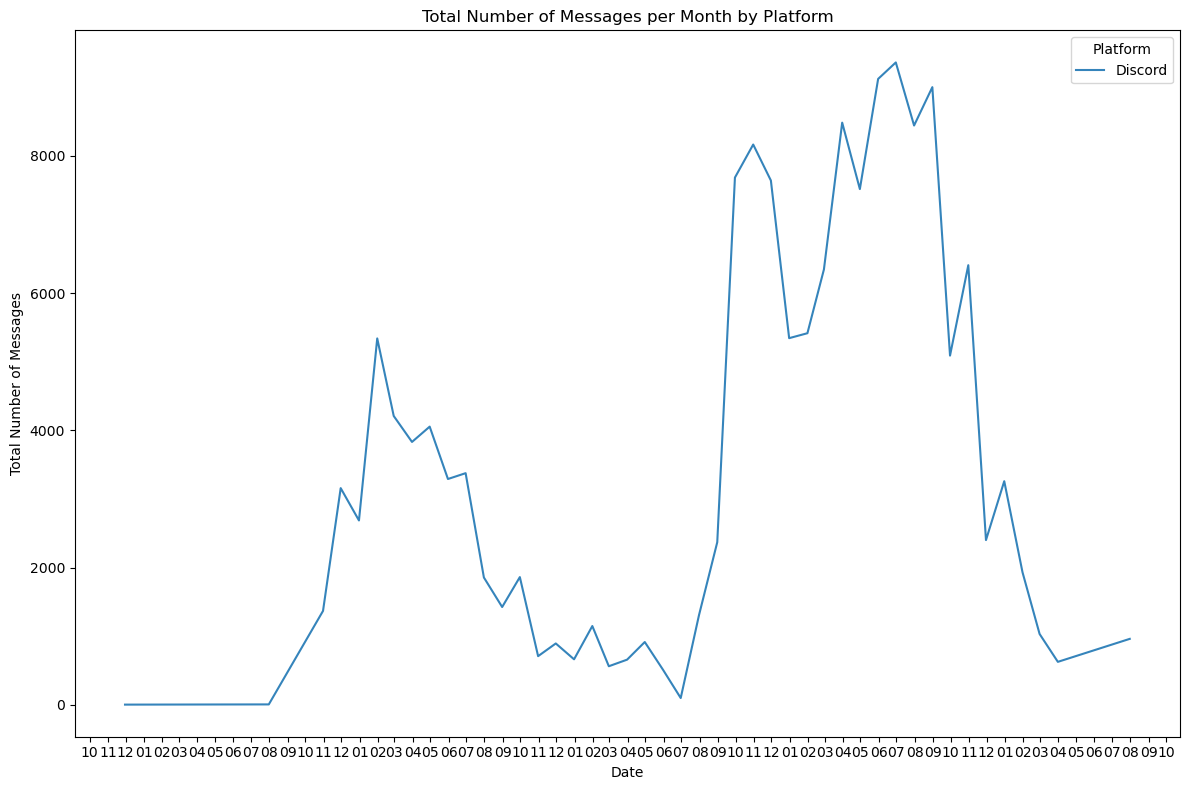

C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\3323349533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = 'mixed')
C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\3323349533.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


hi


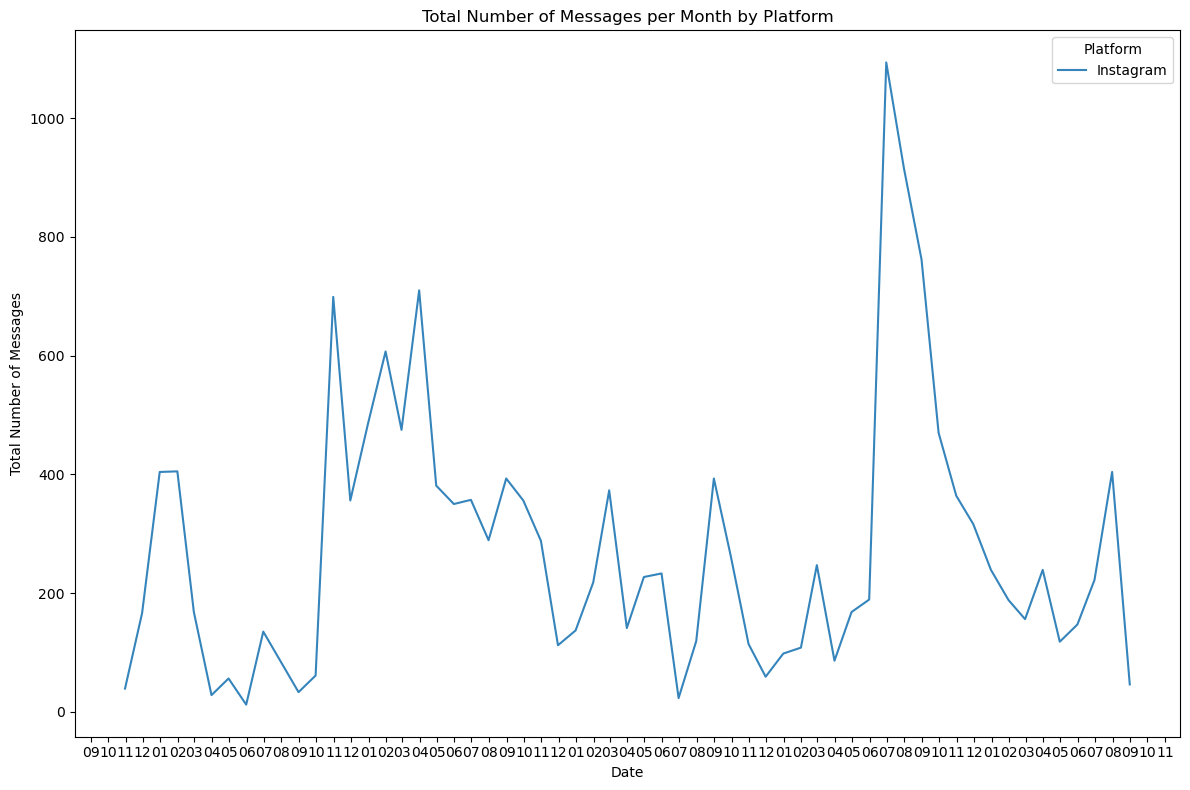

C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\3323349533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = 'mixed')
C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\3323349533.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


hi


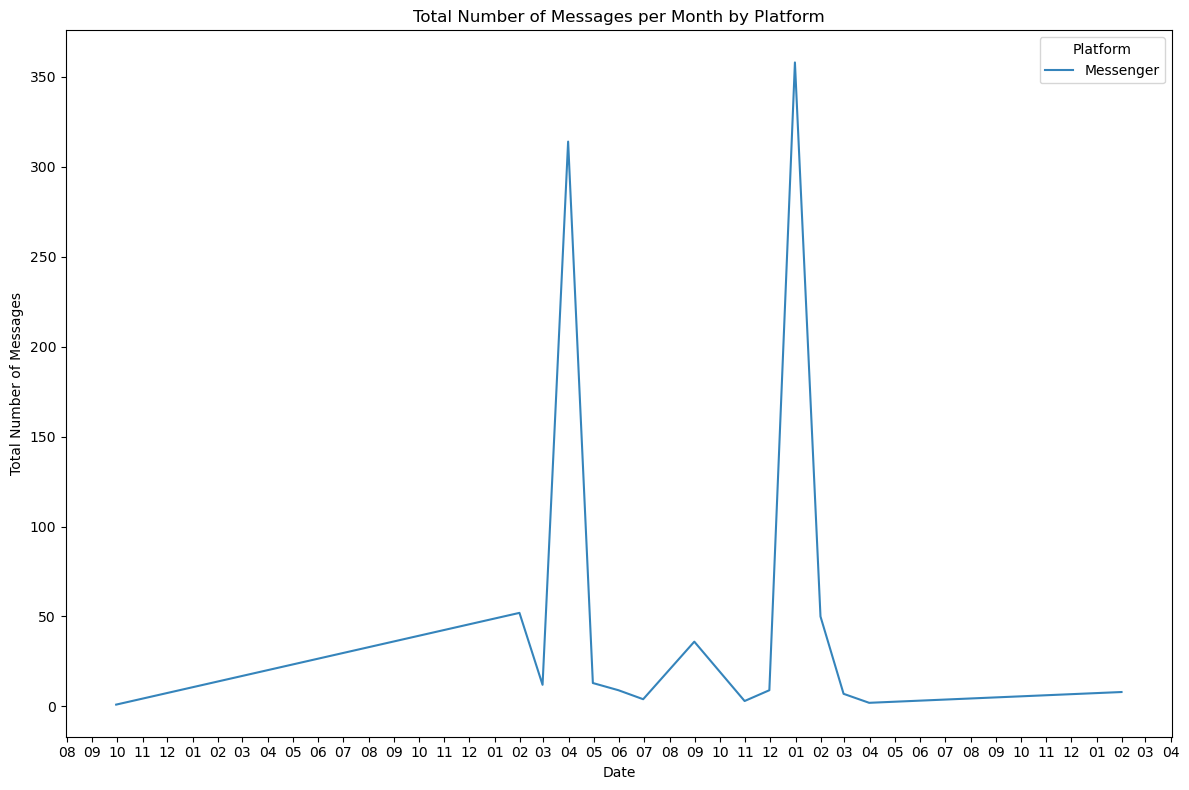

C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\3323349533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = 'mixed')
C:\Users\Roo\AppData\Local\Temp\ipykernel_9204\3323349533.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(platforms))


hi


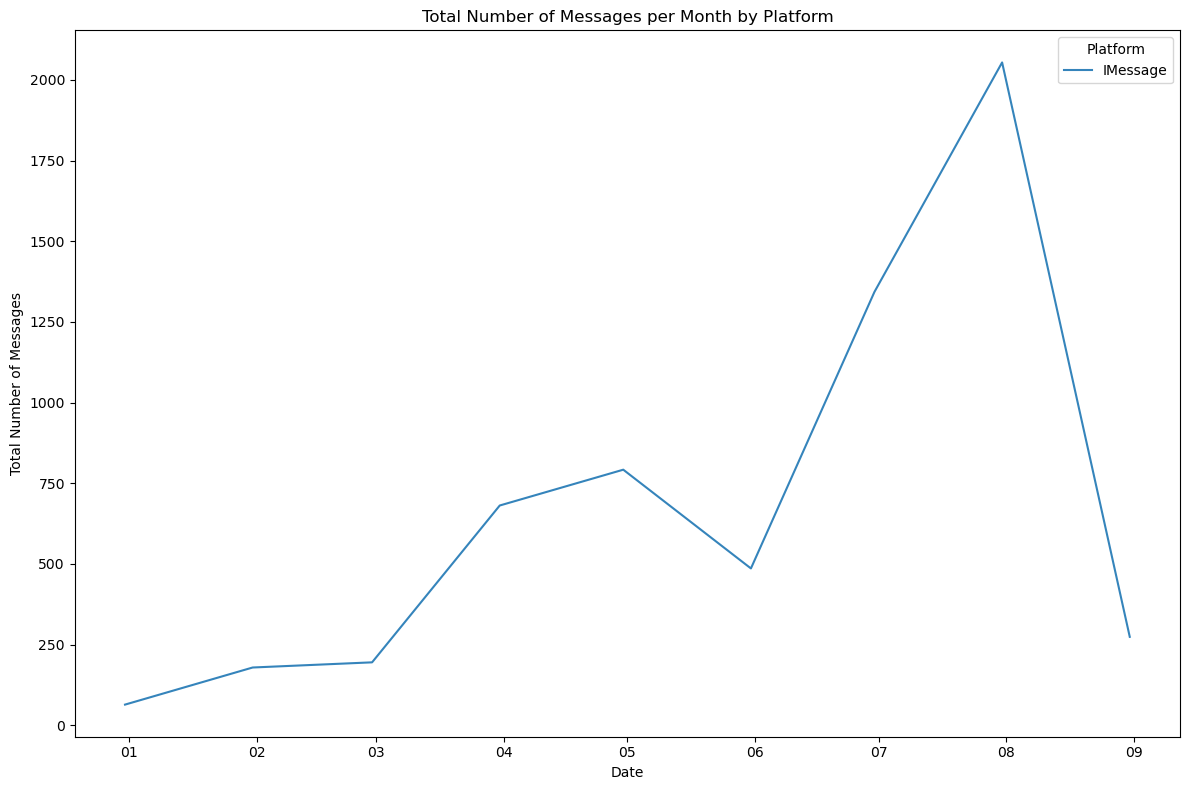

In [94]:
numberOfMonthlyMessages(discord_month)
numberOfMonthlyMessages(ig_month)
numberOfMonthlyMessages(msngr_month)
numberOfMonthlyMessages(imsg_month)